In [1]:
%pip install opencv-python
%pip install keras
%pip install tensorflow
%pip install visualkeras
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Strips & imports all the image file paths image array
def image_extractor(root_dir,image_array,image_labels,label,categories):
    C = []
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg'):
                jpg_file_path = os.path.join(subdir, file)
                image_array.append(jpg_file_path)
                image_labels.append(label)
                

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

directory = '/Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square'
subDirectories = ['Boots','Sandals','Shoes','Slippers']
categories = []
image_array=[]
image_labels=[]

for category in subDirectories:
    path = os.path.join(directory,category) #Path to a certain directory
    label = os.path.basename(path)
    print("Label Part 1:",label)
    for category1 in os.listdir(path):
        subpath = os.path.join(path,category1)
        sublabel = os.path.basename(subpath)+" "+label
        print ("Label:",sublabel)
        categories.append(sublabel)
        image_extractor(subpath,image_array,image_labels,sublabel,categories)
        print("1 ",subpath)
    
print(image_array[0])
print(image_labels[0])
print("Images Length:",len(image_array))
print("Labels Length:",len(image_labels))
print(categories)

Label Part 1: Boots
Label: Prewalker Boots Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Prewalker Boots
Label: .DS_Store Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/.DS_Store
Label: Mid-Calf Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Mid-Calf
Label: Over the Knee Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Over the Knee
Label: Ankle Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Ankle
Label: Knee High Boots
1  /Users/vivibanh/Downloads/kaggle/input/large-shoe-dataset-ut-zappos50k/ut-zap50k-images-square/ut-zap50k-images-square/Boots/Knee High
Labe

In [4]:
import pandas as pd
import numpy as np 
import pandas as pd
import os
from pathlib import Path
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
import matplotlib.pyplot as plt

# load label file
filepaths = pd.Series(image_array, name='ImagePaths').astype(str)
Labels = pd.Series(image_labels, name='Labels').astype(str)

img_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
img_df.head()

,ImagePaths,Labels
0,/Users/vivibanh/Downloads/kaggle/input/large-s...,Prewalker Boots Boots
1,/Users/vivibanh/Downloads/kaggle/input/large-s...,Prewalker Boots Boots
2,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots
3,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots
4,/Users/vivibanh/Downloads/kaggle/input/large-s...,Mid-Calf Boots


In [5]:
# check labels
img_df = img_df.groupby('Labels').filter(lambda x : len(x)>=10)
img_df['Labels'].value_counts(ascending=True)

Slipper Heels Slippers                  10
Boot Slippers                           14
Athletic Sandals                        14
Crib Shoes Shoes                        23
Over the Knee Boots                     49
Heel Sandals                           126
Prewalker Shoes                        249
Firstwalker Shoes                      369
Boat Shoes Shoes                       629
Slipper Flats Slippers                1259
Clogs and Mules Shoes                 1427
Oxfords Shoes                         2044
Knee High Boots                       2202
Loafers Shoes                         2875
Flats Shoes                           3994
Mid-Calf Boots                        4726
Flat Sandals                          5601
Heels Shoes                           5739
Ankle Boots                           5855
Sneakers and Athletic Shoes Shoes    12859
Name: Labels, dtype: int64

In [6]:
# show label information
img_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50064 entries, 2 to 50065
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ImagePaths  50064 non-null  object
 1   Labels      50064 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
# Define the image size you want for the model input
img_height = 224
img_width = 224
# Training batch size
batch_size = 32

In [8]:
# Split the DataFrame into train, test and validation sets
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test = train_test_split(img_df, test_size=1 - train_ratio, stratify=img_df['Labels'])
x_val, x_test = train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=x_test['Labels']) 

print(f'Shape of Training Data : ',x_train.shape)
print(f'Shape of Testing Data : ',x_test.shape)
print(f'Shape of Validation Data : ',x_val.shape)
x_test = x_test.copy()

Shape of Training Data :  (35044, 2)
Shape of Testing Data :  (7510, 2)
Shape of Validation Data :  (7510, 2)


In [9]:
# Create ImageDataGenerator for data augmentation and normalization
img_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
img_size=(224, 224)      

# Flow from DataFrame for training data
x_train = img_datagen.flow_from_dataframe(
    dataframe = x_train, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size, 
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Flow from DataFrame for test data
x_test = img_datagen.flow_from_dataframe(
    dataframe = x_test, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Flow from DataFrame for validation data
x_val = img_datagen.flow_from_dataframe(
    dataframe = x_val, 
    x_col='ImagePaths', 
    y_col='Labels', 
    target_size=img_size, 
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,seed=42
)

# Check the classes and class indices
print("Classes: ", x_train.class_indices)

Found 35044 validated image filenames belonging to 20 classes.
Found 7510 validated image filenames belonging to 20 classes.
Found 7510 validated image filenames belonging to 20 classes.
Classes:  {'Ankle Boots': 0, 'Athletic Sandals': 1, 'Boat Shoes Shoes': 2, 'Boot Slippers': 3, 'Clogs and Mules Shoes': 4, 'Crib Shoes Shoes': 5, 'Firstwalker Shoes': 6, 'Flat Sandals': 7, 'Flats Shoes': 8, 'Heel Sandals': 9, 'Heels Shoes': 10, 'Knee High Boots': 11, 'Loafers Shoes': 12, 'Mid-Calf Boots': 13, 'Over the Knee Boots': 14, 'Oxfords Shoes': 15, 'Prewalker Shoes': 16, 'Slipper Flats Slippers': 17, 'Slipper Heels Slippers': 18, 'Sneakers and Athletic Shoes Shoes': 19}


In [10]:
# get classes
class_names = list(x_train.class_indices.keys())
print(class_names)

['Ankle Boots', 'Athletic Sandals', 'Boat Shoes Shoes', 'Boot Slippers', 'Clogs and Mules Shoes', 'Crib Shoes Shoes', 'Firstwalker Shoes', 'Flat Sandals', 'Flats Shoes', 'Heel Sandals', 'Heels Shoes', 'Knee High Boots', 'Loafers Shoes', 'Mid-Calf Boots', 'Over the Knee Boots', 'Oxfords Shoes', 'Prewalker Shoes', 'Slipper Flats Slippers', 'Slipper Heels Slippers', 'Sneakers and Athletic Shoes Shoes']


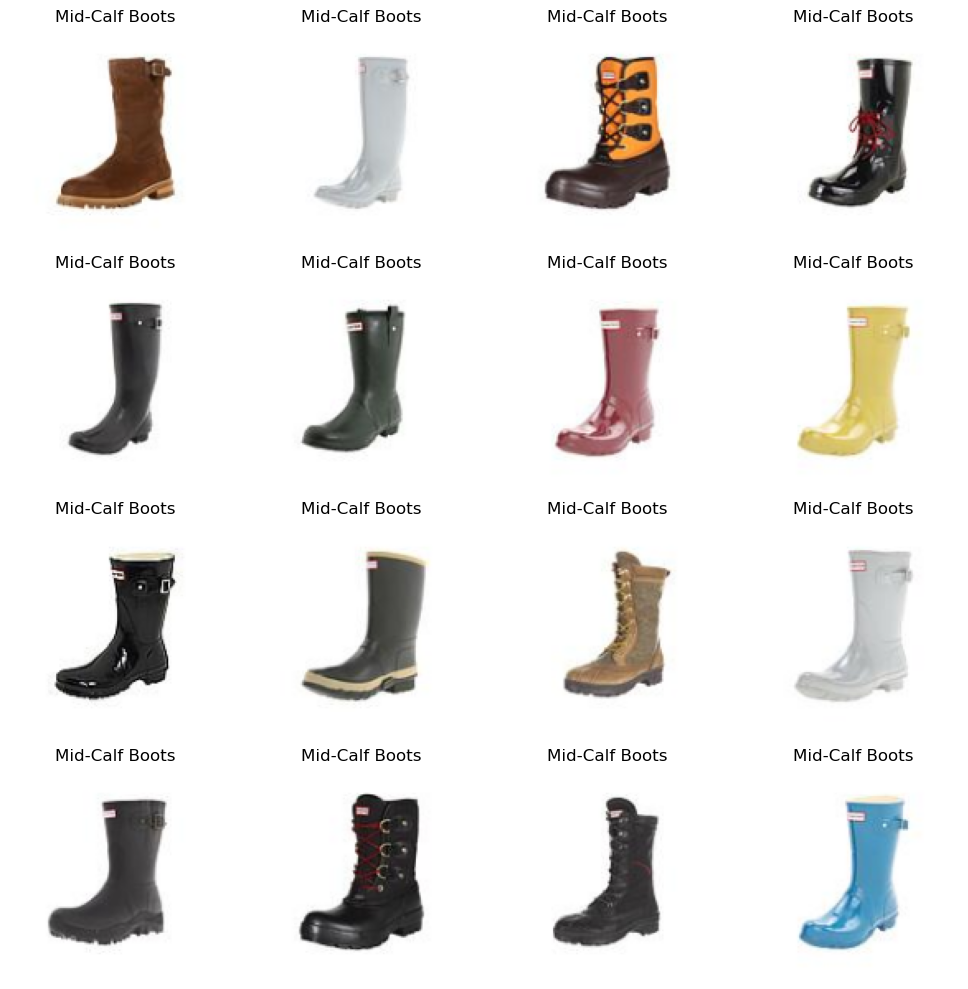

In [11]:
# Sample function to read and resize images using OpenCV
def read_and_resize_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)
    return image

# Function to plot images with their labels
def plot_images_with_labels(data_df, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            index = i * num_cols + j
            img_path = data_df.iloc[index]['ImagePaths']
            label = data_df.iloc[index]['Labels']
            image = read_and_resize_image(img_path, (128, 128))
            axes[i, j].imshow(image)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
    
plot_images_with_labels(img_df.head(16))

In [12]:
model = keras.Sequential([

    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                 input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Classifier Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(20, activation="softmax"),
])

model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [13]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

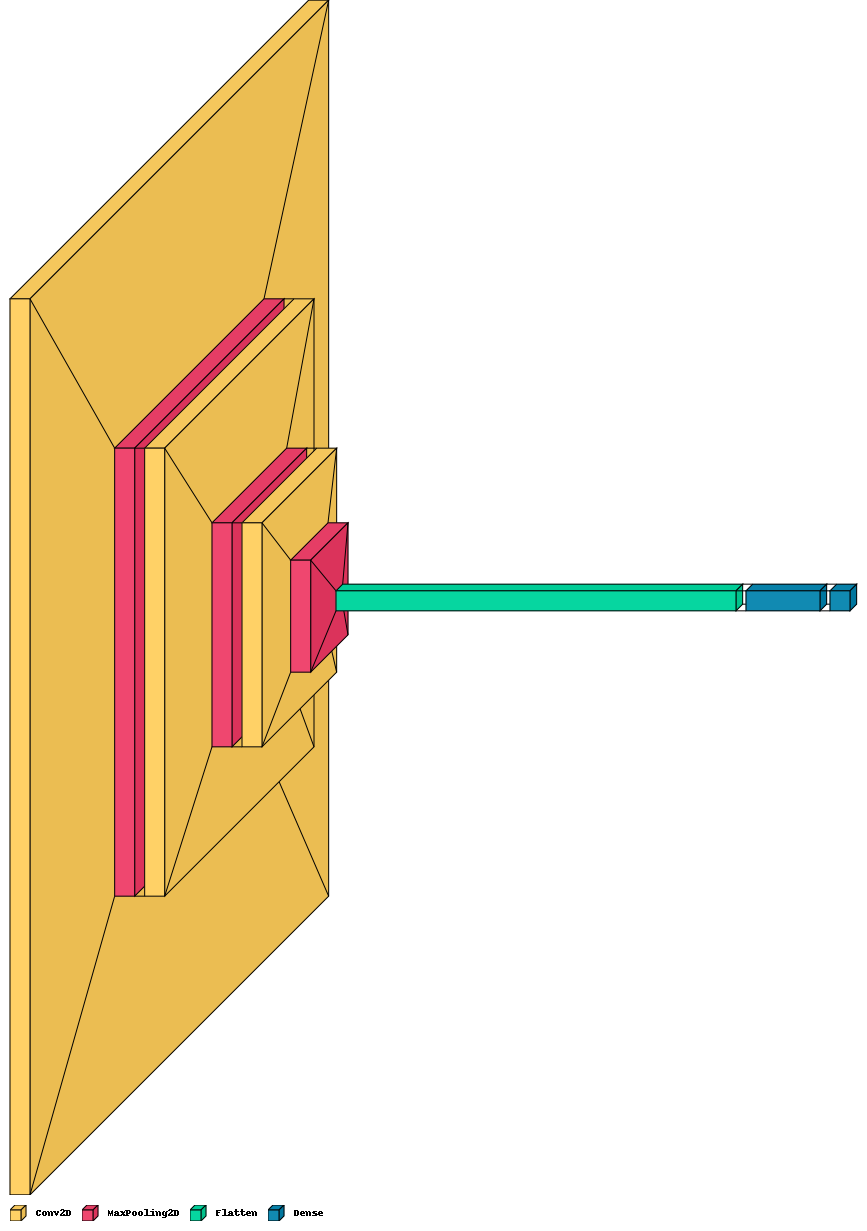

In [14]:
import visualkeras
visualkeras.layered_view(model, legend=True) 

In [15]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_fit = model.fit(x_train,
                      validation_data = x_val, 
                      epochs = 10, callbacks=Callback)


Epoch 1/10
1096/1096 [==============================] - 614s 560ms/step - loss: 0.8243 - accuracy: 0.7440 - val_loss: 0.5817 - val_accuracy: 0.7993
Epoch 2/10
1096/1096 [==============================] - 607s 553ms/step - loss: 0.4464 - accuracy: 0.8457 - val_loss: 0.5371 - val_accuracy: 0.8220
Epoch 3/10
1096/1096 [==============================] - 605s 552ms/step - loss: 0.2545 - accuracy: 0.9069 - val_loss: 0.5890 - val_accuracy: 0.8273
Epoch 4/10
1096/1096 [==============================] - 603s 550ms/step - loss: 0.1264 - accuracy: 0.9544 - val_loss: 0.6743 - val_accuracy: 0.8312
Epoch 5/10
1096/1096 [==============================] - 603s 550ms/step - loss: 0.0795 - accuracy: 0.9713 - val_loss: 0.9508 - val_accuracy: 0.8198
Epoch 6/10
1096/1096 [==============================] - 602s 550ms/step - loss: 0.0629 - accuracy: 0.9791 - val_loss: 1.1887 - val_accuracy: 0.8208
Epoch 7/10
1096/1096 [==============================] - 603s 550ms/step - loss: 0.0517 - accuracy: 0.9832 - val_

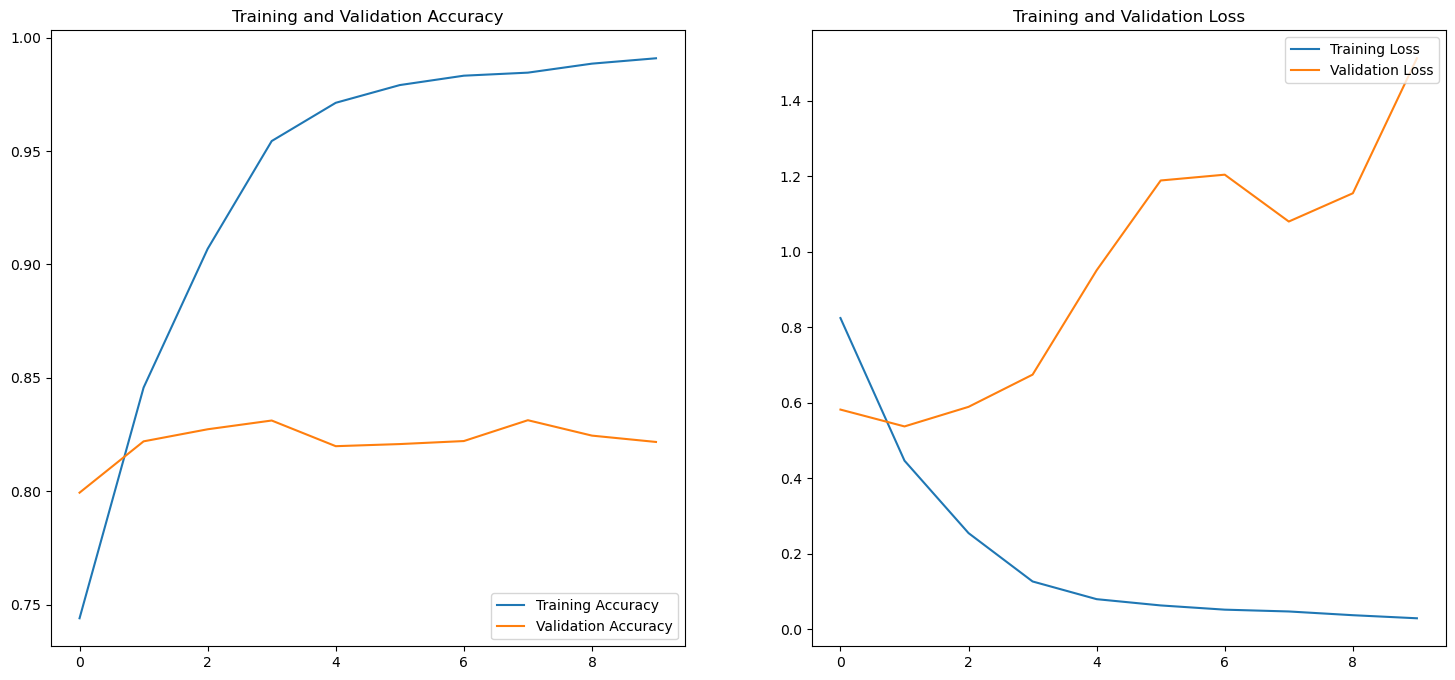

In [16]:
# Visualize training results
epochs = 10
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Dropout

In [17]:
dropout_model = keras.Sequential([

    # First Convolutional Block
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                 input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    # Add 20% dropout
    tf.keras.layers.Dropout(0.2),

    # Classifier Head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(20, activation="softmax"),
])

dropout_model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

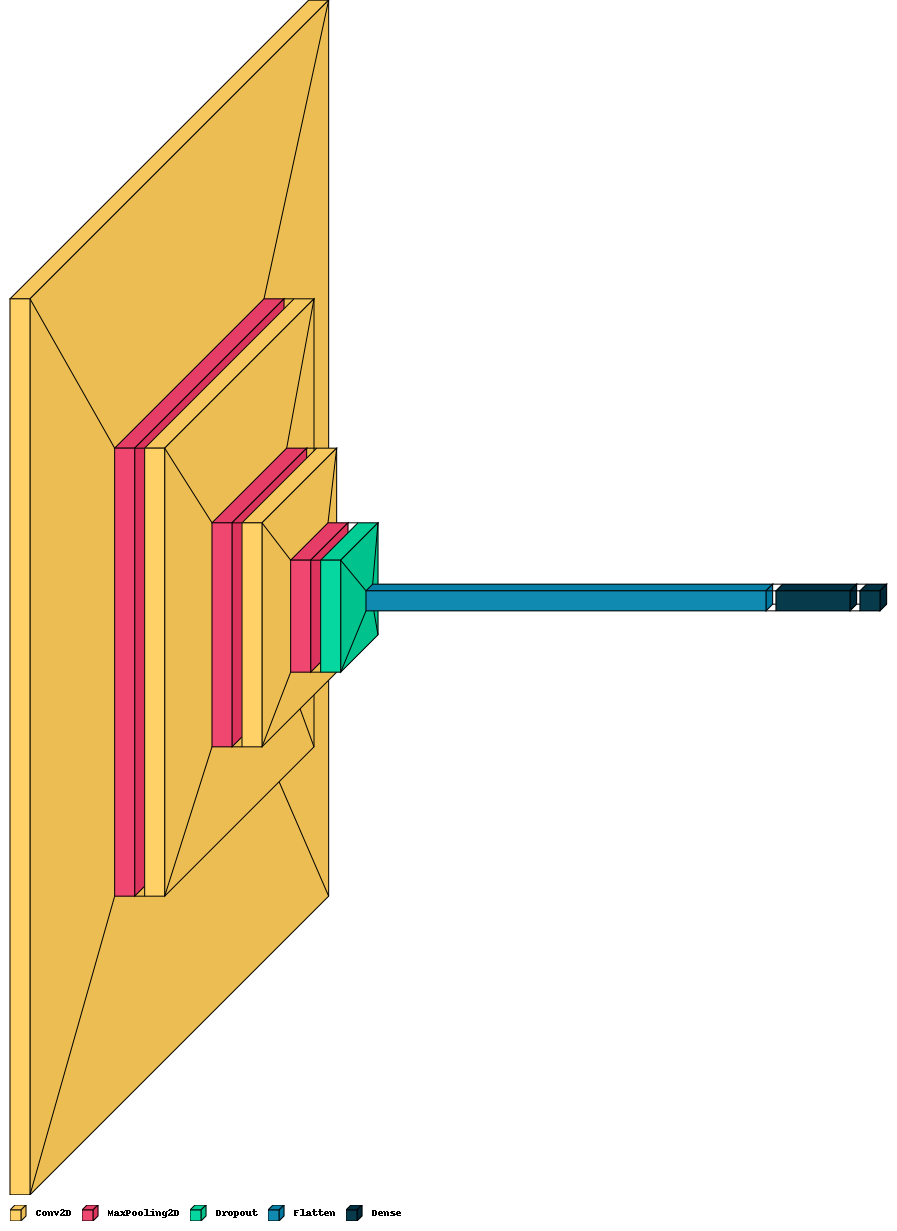

In [18]:
# schematic CNN withdropout
visualkeras.layered_view(dropout_model, legend=True) 

In [19]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
dropout_model_fit = dropout_model.fit(x_train,
                      validation_data = x_val, 
                      epochs = 10, callbacks=Callback)


Epoch 1/10
1096/1096 [==============================] - 610s 556ms/step - loss: 0.8522 - accuracy: 0.7392 - val_loss: 0.5799 - val_accuracy: 0.8033
Epoch 2/10
1096/1096 [==============================] - 609s 555ms/step - loss: 0.4679 - accuracy: 0.8391 - val_loss: 0.5428 - val_accuracy: 0.8169
Epoch 3/10
1096/1096 [==============================] - 606s 553ms/step - loss: 0.3094 - accuracy: 0.8912 - val_loss: 0.5132 - val_accuracy: 0.8411
Epoch 4/10
1096/1096 [==============================] - 607s 554ms/step - loss: 0.1876 - accuracy: 0.9315 - val_loss: 0.5563 - val_accuracy: 0.8403
Epoch 5/10
1096/1096 [==============================] - 608s 555ms/step - loss: 0.1207 - accuracy: 0.9574 - val_loss: 0.7281 - val_accuracy: 0.8348
Epoch 6/10
1096/1096 [==============================] - 608s 555ms/step - loss: 0.0864 - accuracy: 0.9689 - val_loss: 0.8688 - val_accuracy: 0.8340
Epoch 7/10
1096/1096 [==============================] - 606s 553ms/step - loss: 0.0689 - accuracy: 0.9752 - val_

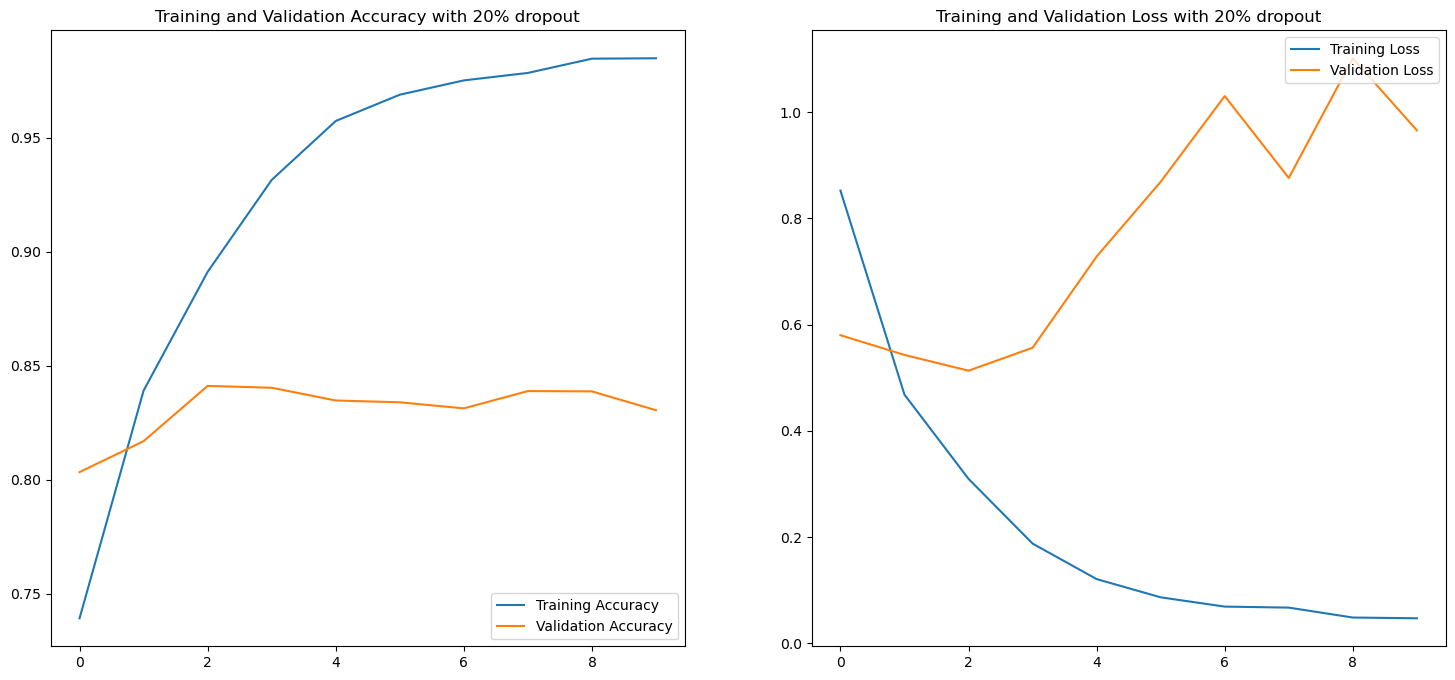

In [20]:
# Visualize training results
epochs = 10
acc = dropout_model_fit.history['accuracy']
val_acc = dropout_model_fit.history['val_accuracy']

loss = dropout_model_fit.history['loss']
val_loss = dropout_model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with 20% dropout')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with 20% dropout')
plt.show()

In [43]:
# Evaluate models
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )
# Evaluate models
valid_accuracy = model.evaluate(x_val)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

235/235 [==============================] - 34s 145ms/step - loss: 1.4399 - accuracy: 0.8224
Test accuracy is :  82.2370171546936 %
235/235 [==============================] - 34s 145ms/step - loss: 1.5124 - accuracy: 0.8217
Test accuracy is :  82.2370171546936 %


In [45]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

235/235 [==============================] - 34s 145ms/step


In [46]:
# Make predictions
print("Prediction(0)",predictions[0])
print("Prediction(1)",np.argmax(predictions[0]))
print("Prediction(2)",categories[np.argmax(predictions[0])])
print("")

directory='/Users/vivibanh/Downloads/kaggle/input'
# Initialize lists to store results
predicted_labels = []
predicted_probabilities = []

# Loop through all images in the directory
for image_filename in os.listdir(directory):
    if image_filename.endswith('.png'):
        # Load and preprocess the image
        image_path = os.path.join(directory, image_filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224)) 
        image = image / 255.0 
        image = np.expand_dims(image, axis=0)

        # Make prediction using the trained model
        probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
        predictions = probability_model.predict(image)

        # Get the predicted class label and probability
        predicted_class_index = np.argmax(predictions[0])
        predicted_class_label = categories[predicted_class_index]
        predicted_probability = predictions[0][predicted_class_index]

        # Append the results to the lists
        predicted_labels.append(predicted_class_label)
        predicted_probabilities.append(predicted_probability)

# Print the results for each image
for i in range(len(predicted_labels)):
    print("Image:", os.listdir(directory)[i])
    print("Predicted Class Label:", predicted_labels[i])
    print("Predicted Probability:", predicted_probabilities[i])
    print()


Prediction(0) [0.04628353 0.04634059 0.04628353 0.04628353 0.04628353 0.04628353
 0.04628353 0.04854045 0.11731148 0.04628407 0.04628371 0.04628353
 0.04628445 0.04628353 0.04628353 0.04628353 0.04628353 0.04628356
 0.04628353 0.04726925]
Prediction(1) 8
Prediction(2) Heel Sandals



In [47]:
###### Model 2 with more layers
model2 = keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    
    # Adding more Convolutional layers
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    tf.keras.layers.MaxPool2D(),
    
    # Classifier Head
    tf.keras.layers.Flatten(),
    
    # Adding more Dense layers
    tf.keras.layers.Dense(740, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    
    tf.keras.layers.Dense(20, activation="softmax"),
])

model2.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])


In [48]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
model_fit = model2.fit(x_train,
                      validation_data = x_val, 
                      epochs = 10, callbacks=Callback)

Epoch 1/10
1096/1096 [==============================] - 611s 557ms/step - loss: 0.8664 - accuracy: 0.7238 - val_loss: 0.6095 - val_accuracy: 0.7909
Epoch 2/10
1096/1096 [==============================] - 610s 557ms/step - loss: 0.4981 - accuracy: 0.8331 - val_loss: 0.5475 - val_accuracy: 0.8193
Epoch 3/10
1096/1096 [==============================] - 650s 593ms/step - loss: 0.3190 - accuracy: 0.8887 - val_loss: 0.5736 - val_accuracy: 0.8144
Epoch 4/10
1096/1096 [==============================] - 653s 596ms/step - loss: 0.2033 - accuracy: 0.9291 - val_loss: 0.6558 - val_accuracy: 0.8286
Epoch 5/10
1096/1096 [==============================] - 630s 575ms/step - loss: 0.1274 - accuracy: 0.9567 - val_loss: 0.7766 - val_accuracy: 0.8197
Epoch 6/10
1096/1096 [==============================] - 627s 572ms/step - loss: 0.0955 - accuracy: 0.9676 - val_loss: 0.8552 - val_accuracy: 0.8197
Epoch 7/10
1096/1096 [==============================] - 622s 568ms/step - loss: 0.0702 - accuracy: 0.9766 - val_

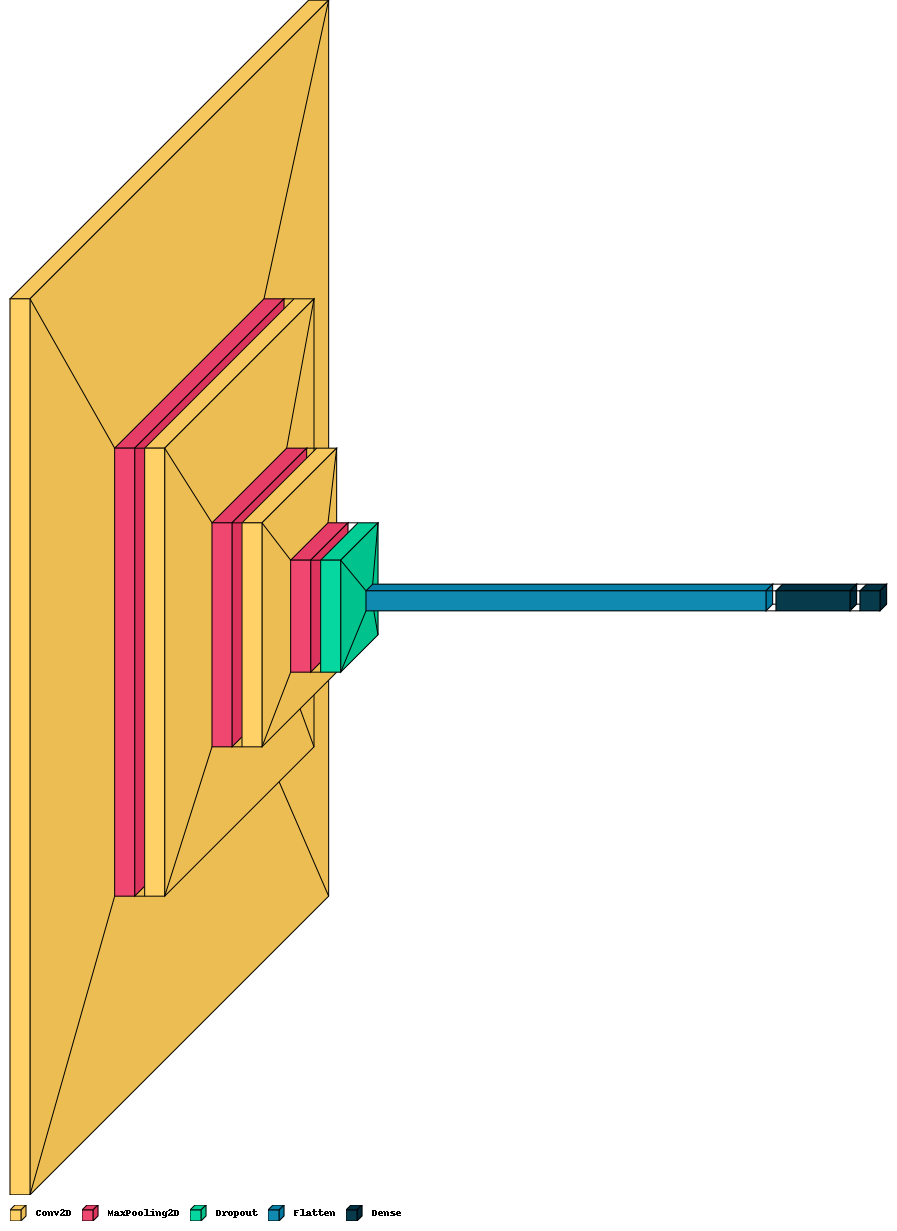

In [51]:
# schematic CNN withdropout
visualkeras.layered_view(dropout_model, legend=True) 

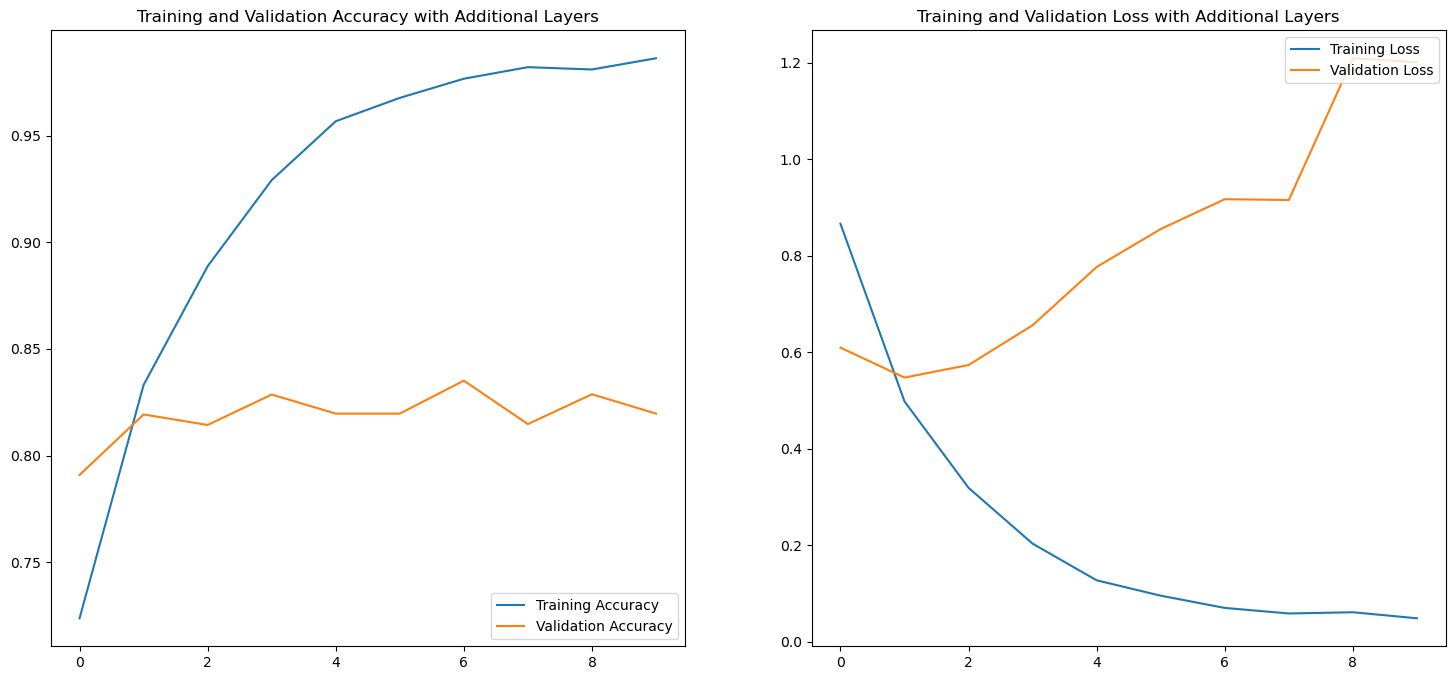

In [52]:
# Visualize training results
epochs = 10
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Additional Layers')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Additional Layers')
plt.show()

In [50]:
# Make predictions
probability_model = tf.keras.Sequential([model2,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
print("Prediction(0)",predictions[0])
print("Prediction(1)",np.argmax(predictions[0]))
print("Prediction(2)",categories[np.argmax(predictions[0])])
print("")


directory = '/Users/vivibanh/Downloads/kaggle/input'
# Initialize lists to store results
predicted_labels = []
predicted_probabilities = []

# Load the categories list if not already loaded
if len(categories) == 0:
    categories = ['Ankle Boots', 'Athletic Sandals', 'Boat Shoes Shoes', 'Boot Slippers', 
                  'Clogs and Mules Shoes', 'Crib Shoes Shoes', 'Firstwalker Shoes', 'Flat Sandals', 'Flats Shoes', 
                  'Heel Sandals', 'Heels Shoes', 'Knee High Boots', 'Loafers Shoes', 'Mid-Calf Boots', 
                  'Over the Knee Boots', 'Oxfords Shoes', 'Prewalker Shoes', 
                  'Slipper Flats Slippers', 'Slipper Heels Slippers', 'Sneakers and Athletic Shoes Shoes'] 

# Loop through all images in the directory
for image_filename in os.listdir(directory):
    if image_filename.endswith('.png'):
        # Load and preprocess the image
        image_path = os.path.join(directory, image_filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224)) 
        image = image / 255.0 
        image = np.expand_dims(image, axis=0)

        # Make prediction using the trained model
        probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
        predictions = probability_model.predict(image)

        # Get the predicted class label and probability
        predicted_class_index = np.argmax(predictions[0])
        predicted_class_label = categories[predicted_class_index]
        predicted_probability = predictions[0][predicted_class_index]

        # Append the results to the lists
        predicted_labels.append(predicted_class_label)
        predicted_probabilities.append(predicted_probability)

# Print the results for each image
for i in range(len(predicted_labels)):
    print("Image:", os.listdir(directory)[i])
    print("Predicted Class Label:", predicted_labels[i])
    print("Predicted Probability:", predicted_probabilities[i])
    print()

235/235 [==============================] - 35s 148ms/step
Prediction(0) [0.12516099 0.04604416 0.04604416 0.04604416 0.04604416 0.04604416
 0.04604416 0.04604416 0.04604416 0.04604416 0.04604416 0.04604416
 0.04604416 0.04604416 0.04604416 0.04604416 0.04604416 0.04604416
 0.04604416 0.04604416]
Prediction(1) 0
Prediction(2) Prewalker Boots Boots

